In [1]:
import sys
import cv as cv
import numpy as np
import math
from matplotlib import pyplot as plt
import csv
from skimage.morphology import skeletonize

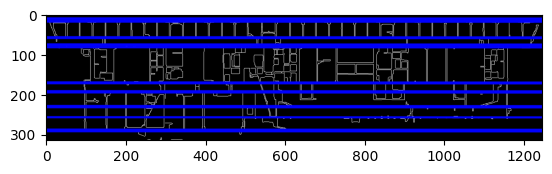

In [172]:


filename = 'img/reassembled_E2_2.png'

# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
# Check if image is loaded fine
if src is None:
    print ('Error opening image!')
    print ('Usage: hough_lines.py [image_name -- default ' + filename + '] \n')

##########
kernel = np.ones((5,5),np.uint8)
src = cv.morphologyEx(src, cv.MORPH_OPEN, kernel, iterations=3)
##########

dst = cv.Canny(src, 50, 200, None, 3)

# Copy edges to the images that will display the results in BGR
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

# Assuming 'src' is your source image and it's already loaded
height, width = src.shape[:2]  # Get the dimensions of the image

# Maximum distance possible within the image diagonal
max_len = int(np.sqrt(width**2 + height**2))

lines = cv.HoughLines(dst, 1, np.pi / 180, 250, None, 0, 0)

# Now use max_len instead of 1000 to ensure lines go across the entire image
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
        pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# Display the result
plt.imshow(cdst)
plt.show()



Square Hough Transform

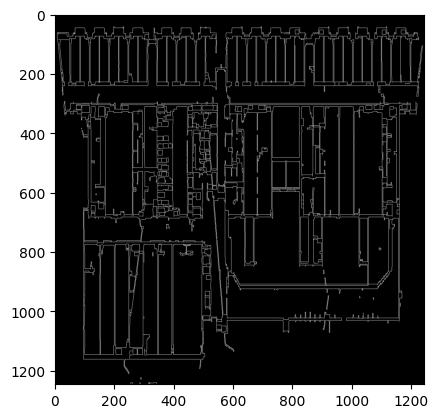

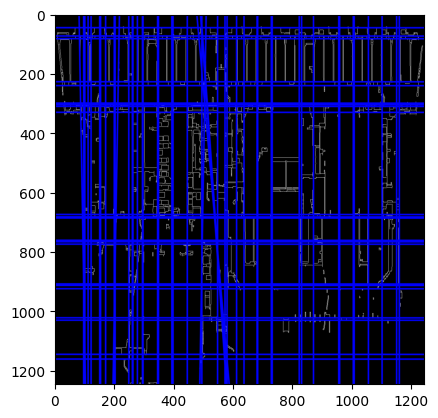

In [203]:
import cv as cv
import numpy as np
import math
import matplotlib.pyplot as plt

filename = 'img/reassembled_E2_2.png'

# Loads an image
src = cv.imread(cv.samples.findFile(filename), cv.IMREAD_GRAYSCALE)
if src is None:
    print('Error opening image!')
    print('Usage: hough_lines.py [image_name -- default ' + filename + '] \n')
    exit()

# Resize the image to make it square
max_dim = max(src.shape[:2])
src_square = cv.resize(src, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# Apply morphological opening
kernel = np.ones((5,5),np.uint8)
src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Detect lines
lines = cv.HoughLines(dst, 1, np.pi / 180, 250, None, 0, 0)

plt.imshow(cdst)
plt.show()

# Draw lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        max_len = int(np.sqrt(2) * max_dim)  # Diagonal of the square image
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
        pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# Display the result
plt.imshow(cdst)
plt.show()


Square Hough Transform with RBG Research Image Processing

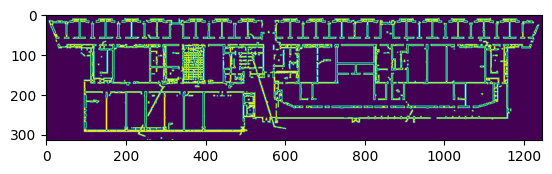

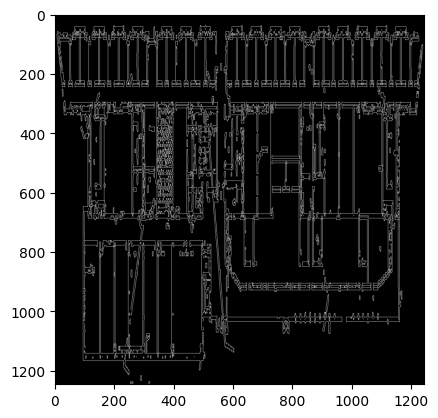

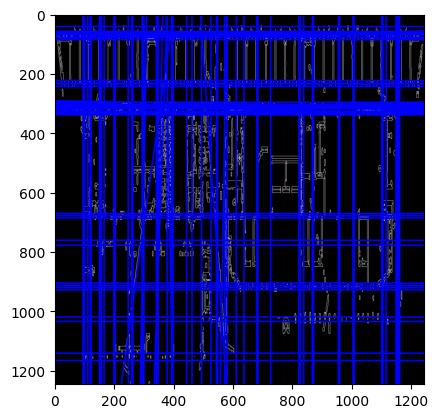

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img_path = 'img/reassembled_E2_2.png'
# Read floorplan image
img = cv.imread(img_path)

# Grayscale image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
sure_bg = cv.dilate(thresh,kernel,iterations=1)
dist_transform = cv.distanceTransform(thresh,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(0.5*dist_transform,0.2*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

plt.imshow(unknown)
plt.show()
################################################################
# Resize the image to make it square
max_dim = max(unknown.shape[:2])
src_square = cv.resize(unknown, (max_dim, max_dim), interpolation=cv.INTER_LINEAR)

# # Apply morphological opening
# kernel = np.ones((5,5),np.uint8)
# src_square = cv.morphologyEx(src_square, cv.MORPH_OPEN, kernel, iterations=3)

# Edge detection
dst = cv.Canny(src_square, 50, 200, None, 3)

# Convert to BGR image for display
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

# Detect lines
lines = cv.HoughLines(dst, 1, np.pi / 180, 250, None, 0, 0)

plt.imshow(cdst)
plt.show()

# Draw lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        max_len = int(np.sqrt(2) * max_dim)  # Diagonal of the square image
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len*(a)))
        pt2 = (int(x0 - max_len*(-b)), int(y0 - max_len*(a)))
        cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

# Display the result
plt.imshow(cdst)
plt.show()

Hough Transform with Junction Intersection

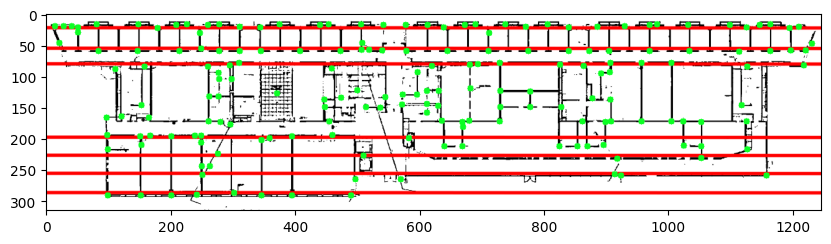

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('img/reassembled_E2_2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
inverted_thresh = cv2.bitwise_not(thresh)
cv2.imwrite('inverted_image.png', inverted_thresh)

# Morphological closing and dilation to clean up the image
kernel = np.ones((5,5), np.uint8)
img = cv2.morphologyEx(inverted_thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
img = cv2.dilate(img, kernel, iterations=1)

# Find horizontal and vertical lines using morphological operations
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
horizontal = cv2.morphologyEx(img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
vertical = cv2.morphologyEx(img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Custom diagonal kernels
size = 10
diag1_kernel = np.eye(size, dtype=np.uint8)
diag2_kernel = np.fliplr(diag1_kernel)
diagonal1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, diag1_kernel, iterations=2)
diagonal2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, diag2_kernel, iterations=2)

# Find joints by intersecting the horizontal and vertical lines
hv_intersections = cv2.bitwise_and(horizontal, vertical)
hd1_intersections = cv2.bitwise_and(horizontal, diagonal1)
hd2_intersections = cv2.bitwise_and(horizontal, diagonal2)
vd1_intersections = cv2.bitwise_and(vertical, diagonal1)
vd2_intersections = cv2.bitwise_and(vertical, diagonal2)
dd_intersections = cv2.bitwise_and(diagonal1, diagonal2)

# Combine all intersections to find all joints
joints = cv2.bitwise_or(hv_intersections, hd1_intersections)
joints = cv2.bitwise_or(joints, hd2_intersections)
joints = cv2.bitwise_or(joints, vd1_intersections)
joints = cv2.bitwise_or(joints, vd2_intersections)
joints = cv2.bitwise_or(joints, dd_intersections)

# Find centroids of the joints
cnts, _ = cv2.findContours(joints, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
centroids = []
for c in cnts:
    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        centroids.append((cx, cy))

# Maximum distance possible within the image diagonal for drawing lines
height, width = img.shape[:2]
max_len = int(np.sqrt(width**2 + height**2))

# Apply Canny edge detection and Hough Transform to find lines
edges = cv2.Canny(img, 50, 200, None, 3)
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200, None, 0, 0)

# Now use max_len instead of 1000 to ensure lines go across the entire image
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len * (a)))
        pt2 = (int(x0 - max_len * (-b)), int(y0 - max_len * (a)))

        # Draw only the lines that intersect with centroids
        intersects = False
        for cx, cy in centroids:
            # Check if the centroids are close to the line
            distance = abs((a * cx) + (b * cy) - rho) / math.sqrt(a**2 + b**2)
            if distance < 1:  # Threshold to consider if a centroid is on the line
                intersects = True
                break  # Stop checking once an intersection is found

        if intersects:
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

# Draw centroids for visual confirmation
for cx, cy in centroids:
    cv2.circle(image, (cx, cy), 5, (36, 255, 12), -1)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib display
plt.show()

Square Hough Transform with Junction Intersection

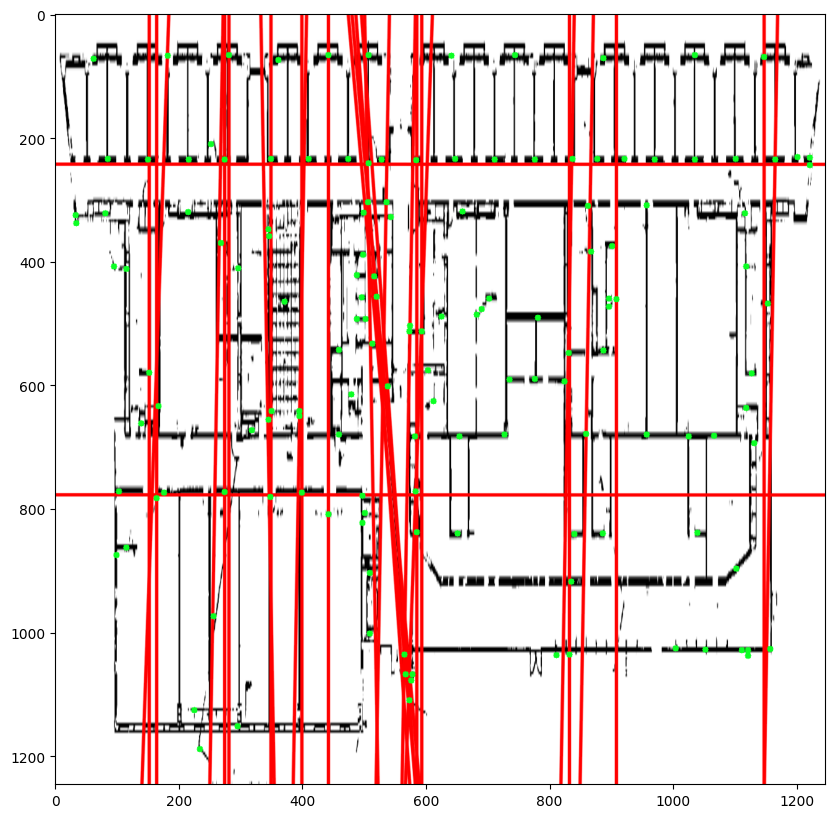

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('img/reassembled_E2_2.png')

# Resize image to a square shape
height, width = image.shape[:2]
size = max(height, width)
square_image = cv2.resize(image, (size, size))

gray = cv2.cvtColor(square_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
inverted_thresh = cv2.bitwise_not(thresh)
cv2.imwrite('inverted_image.png', inverted_thresh)

# Morphological closing and dilation to clean up the image
kernel = np.ones((5,5), np.uint8)
img = cv2.morphologyEx(inverted_thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
img = cv2.dilate(img, kernel, iterations=1)

# Find horizontal and vertical lines using morphological operations
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
horizontal = cv2.morphologyEx(img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
vertical = cv2.morphologyEx(img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Custom diagonal kernels
size = 10
diag1_kernel = np.eye(size, dtype=np.uint8)
diag2_kernel = np.fliplr(diag1_kernel)
diagonal1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, diag1_kernel, iterations=2)
diagonal2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, diag2_kernel, iterations=2)

# Find joints by intersecting the horizontal and vertical lines
hv_intersections = cv2.bitwise_and(horizontal, vertical)
hd1_intersections = cv2.bitwise_and(horizontal, diagonal1)
hd2_intersections = cv2.bitwise_and(horizontal, diagonal2)
vd1_intersections = cv2.bitwise_and(vertical, diagonal1)
vd2_intersections = cv2.bitwise_and(vertical, diagonal2)
dd_intersections = cv2.bitwise_and(diagonal1, diagonal2)

# Combine all intersections to find all joints
joints = cv2.bitwise_or(hv_intersections, hd1_intersections)
joints = cv2.bitwise_or(joints, hd2_intersections)
joints = cv2.bitwise_or(joints, vd1_intersections)
joints = cv2.bitwise_or(joints, vd2_intersections)
joints = cv2.bitwise_or(joints, dd_intersections)

# Find centroids of the joints
cnts, _ = cv2.findContours(joints, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
centroids = []
for c in cnts:
    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        centroids.append((cx, cy))

# Maximum distance possible within the image diagonal for drawing lines
height, width = img.shape[:2]
max_len = int(np.sqrt(width**2 + height**2))

# Apply Canny edge detection and Hough Transform to find lines
edges = cv2.Canny(img, 50, 200, None, 3)
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)

# Now use max_len instead of 1000 to ensure lines go across the entire image
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len * (a)))
        pt2 = (int(x0 - max_len * (-b)), int(y0 - max_len * (a)))

        # Draw only the lines that intersect with centroids
        intersects = False
        for cx, cy in centroids:
            # Check if the centroids are close to the line
            distance = abs((a * cx) + (b * cy) - rho) / math.sqrt(a**2 + b**2)
            if distance < 1:  # Threshold to consider if a centroid is on the line
                intersects = True
                break  # Stop checking once an intersection is found

        if intersects:
            cv2.line(square_image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

# Draw centroids for visual confirmation
for cx, cy in centroids:
    cv2.circle(square_image, (cx, cy), 5, (36, 255, 12), -1)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(square_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib display
plt.show()

Square Hough Transform with Skeletonization and Junction Intersection

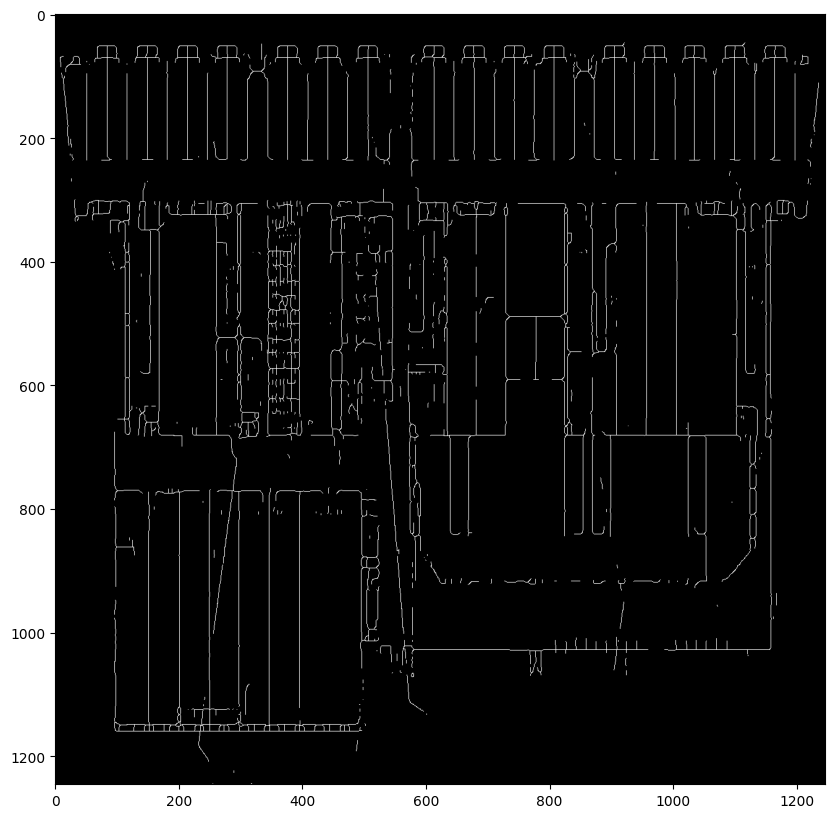

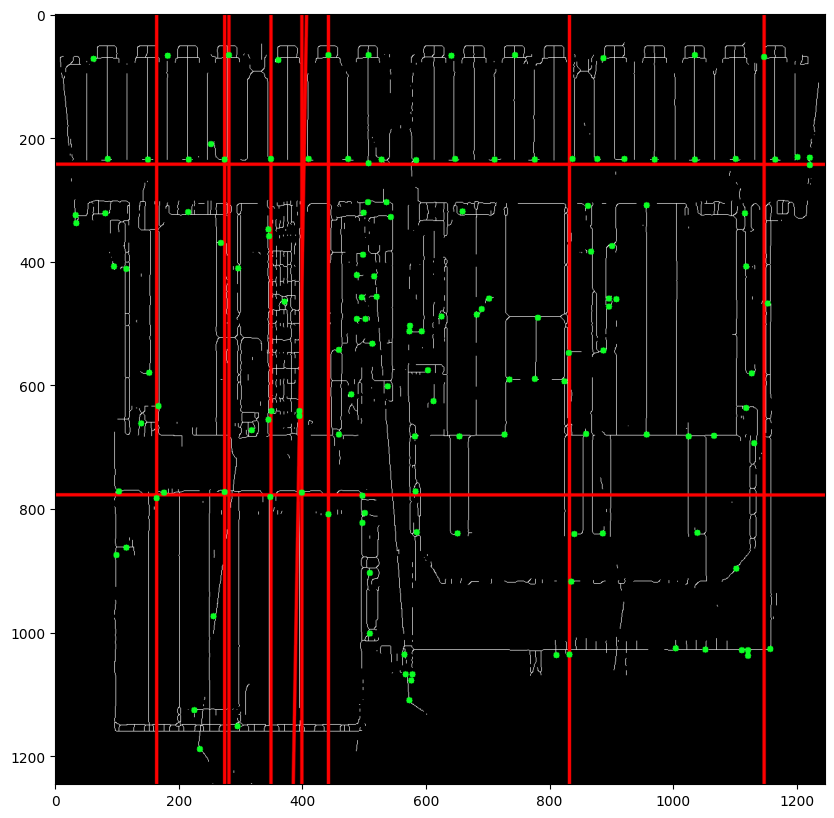

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('img/reassembled_E2_2.png')

# Resize image to a square shape
height, width = image.shape[:2]
size = max(height, width)
square_image = cv2.resize(image, (size, size))

gray = cv2.cvtColor(square_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
inverted_thresh = cv2.bitwise_not(thresh)

# Skeletonization
skeleton = cv2.ximgproc.thinning(inverted_thresh, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
skeleton = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(skeleton, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib display
plt.show()

# Morphological closing and dilation to clean up the image
kernel = np.ones((5,5), np.uint8)
img = cv2.morphologyEx(inverted_thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
img = cv2.dilate(img, kernel, iterations=1)

# Find horizontal and vertical lines using morphological operations
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
horizontal = cv2.morphologyEx(img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
vertical = cv2.morphologyEx(img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Custom diagonal kernels
size = 10
diag1_kernel = np.eye(size, dtype=np.uint8)
diag2_kernel = np.fliplr(diag1_kernel)
diagonal1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, diag1_kernel, iterations=2)
diagonal2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, diag2_kernel, iterations=2)

# Find joints by intersecting the horizontal and vertical lines
hv_intersections = cv2.bitwise_and(horizontal, vertical)
hd1_intersections = cv2.bitwise_and(horizontal, diagonal1)
hd2_intersections = cv2.bitwise_and(horizontal, diagonal2)
vd1_intersections = cv2.bitwise_and(vertical, diagonal1)
vd2_intersections = cv2.bitwise_and(vertical, diagonal2)
dd_intersections = cv2.bitwise_and(diagonal1, diagonal2)

# Combine all intersections to find all joints
joints = cv2.bitwise_or(hv_intersections, hd1_intersections)
joints = cv2.bitwise_or(joints, hd2_intersections)
joints = cv2.bitwise_or(joints, vd1_intersections)
joints = cv2.bitwise_or(joints, vd2_intersections)
joints = cv2.bitwise_or(joints, dd_intersections)

# Find centroids of the joints
cnts, _ = cv2.findContours(joints, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
centroids = []
for c in cnts:
    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        centroids.append((cx, cy))

# Maximum distance possible within the image diagonal for drawing lines
height, width = img.shape[:2]
max_len = int(np.sqrt(width**2 + height**2))

# Apply Canny edge detection and Hough Transform to find lines
edges = cv2.Canny(img, 50, 200, None, 3)
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200, None, 0, 0)

# Now use max_len instead of 1000 to ensure lines go across the entire image
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len * (a)))
        pt2 = (int(x0 - max_len * (-b)), int(y0 - max_len * (a)))

        # Draw only the lines that intersect with centroids
        intersects = False
        for cx, cy in centroids:
            # Check if the centroids are close to the line
            distance = abs((a * cx) + (b * cy) - rho) / math.sqrt(a**2 + b**2)
            if distance < 1:  # Threshold to consider if a centroid is on the line
                intersects = True
                break  # Stop checking once an intersection is found

        if intersects:
            cv2.line(skeleton, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

# Draw centroids for visual confirmation
for cx, cy in centroids:
    cv2.circle(skeleton, (cx, cy), 5, (36, 255, 12), -1)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(skeleton, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib display
plt.show()

Rho Experiments

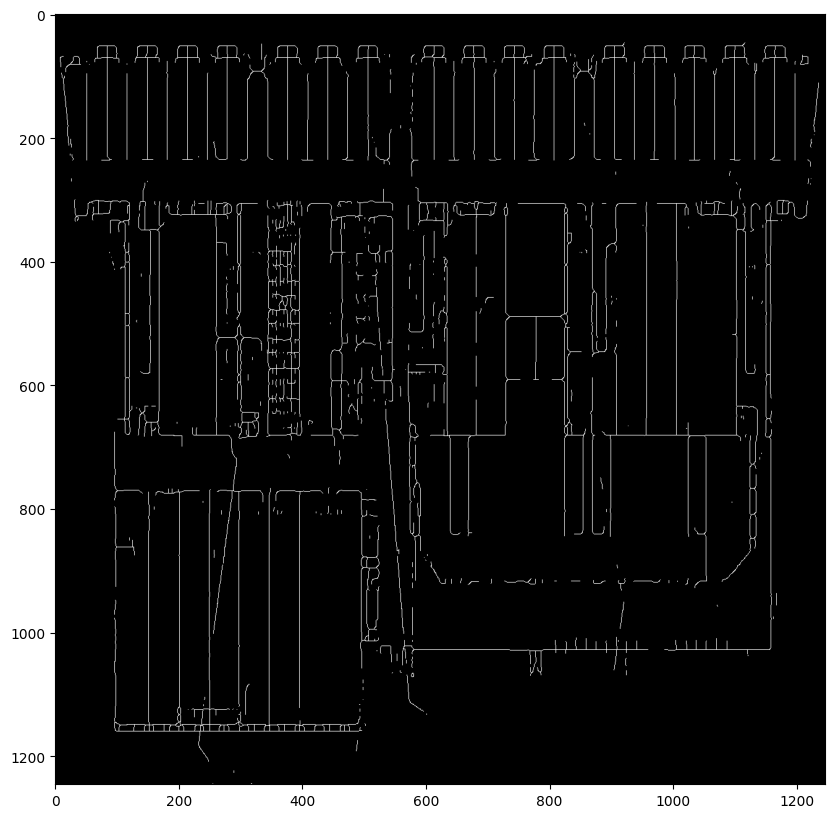

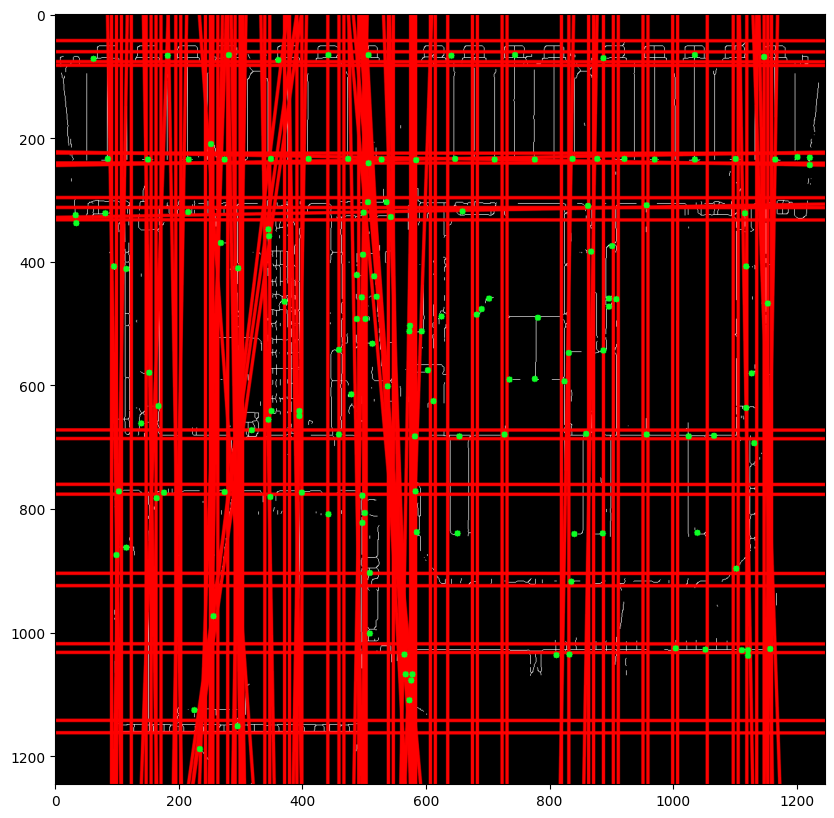

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('img/reassembled_E2_2.png')

# Resize image to a square shape
height, width = image.shape[:2]
size = max(height, width)
square_image = cv2.resize(image, (size, size))

gray = cv2.cvtColor(square_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
_, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
inverted_thresh = cv2.bitwise_not(thresh)

# Skeletonization
skeleton = cv2.ximgproc.thinning(inverted_thresh, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
skeleton = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(skeleton, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib display
plt.show()

# Morphological closing and dilation to clean up the image
kernel = np.ones((5,5), np.uint8)
img = cv2.morphologyEx(inverted_thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
img = cv2.dilate(img, kernel, iterations=1)

# Find horizontal and vertical lines using morphological operations
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
horizontal = cv2.morphologyEx(img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,10))
vertical = cv2.morphologyEx(img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Custom diagonal kernels
size = 10
diag1_kernel = np.eye(size, dtype=np.uint8)
diag2_kernel = np.fliplr(diag1_kernel)
diagonal1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, diag1_kernel, iterations=2)
diagonal2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, diag2_kernel, iterations=2)

# Find joints by intersecting the horizontal and vertical lines
hv_intersections = cv2.bitwise_and(horizontal, vertical)
hd1_intersections = cv2.bitwise_and(horizontal, diagonal1)
hd2_intersections = cv2.bitwise_and(horizontal, diagonal2)
vd1_intersections = cv2.bitwise_and(vertical, diagonal1)
vd2_intersections = cv2.bitwise_and(vertical, diagonal2)
dd_intersections = cv2.bitwise_and(diagonal1, diagonal2)

# Combine all intersections to find all joints
joints = cv2.bitwise_or(hv_intersections, hd1_intersections)
joints = cv2.bitwise_or(joints, hd2_intersections)
joints = cv2.bitwise_or(joints, vd1_intersections)
joints = cv2.bitwise_or(joints, vd2_intersections)
joints = cv2.bitwise_or(joints, dd_intersections)

# Find centroids of the joints
cnts, _ = cv2.findContours(joints, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
centroids = []
for c in cnts:
    M = cv2.moments(c)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        centroids.append((cx, cy))

# Maximum distance possible within the image diagonal for drawing lines
height, width = img.shape[:2]
max_len = int(np.sqrt(width**2 + height**2))

# Apply Canny edge detection and Hough Transform to find lines
edges = cv2.Canny(img, 50, 200, None, 3)
cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(edges, 2, np.pi / 180, 250, None, 0, 0)

# Now use max_len instead of 1000 to ensure lines go across the entire image
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + max_len*(-b)), int(y0 + max_len * (a)))
        pt2 = (int(x0 - max_len * (-b)), int(y0 - max_len * (a)))

        # Draw only the lines that intersect with centroids
        intersects = False
        for cx, cy in centroids:
            # Check if the centroids are close to the line
            distance = abs((a * cx) + (b * cy) - rho) / math.sqrt(a**2 + b**2)
            if distance < 1:  # Threshold to consider if a centroid is on the line
                intersects = True
                break  # Stop checking once an intersection is found

        cv2.line(skeleton, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

# Draw centroids for visual confirmation
for cx, cy in centroids:
    cv2.circle(skeleton, (cx, cy), 5, (36, 255, 12), -1)

# Display the result
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(skeleton, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib display
plt.show()

Hough on Doors and Windows

[[[ 661   57  672   57]]

 [[ 929   15  945   15]]

 [[ 749   60  757   60]]

 ...

 [[1128   18 1135   17]]

 [[ 294  287  300  287]]

 [[ 906  286  913  286]]]


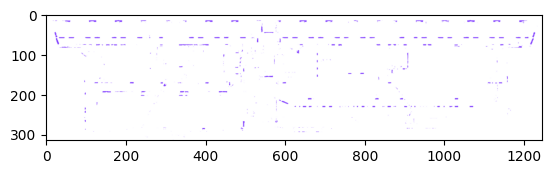

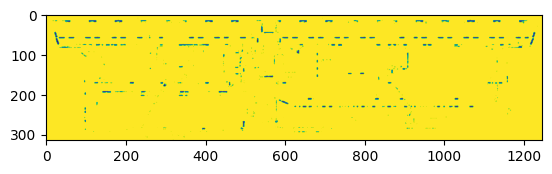

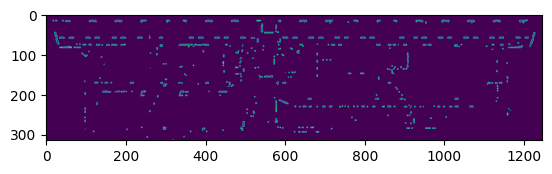

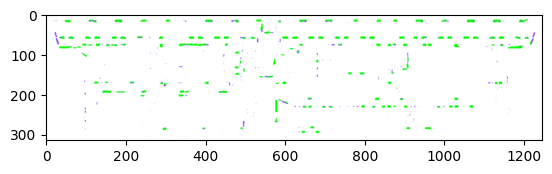

In [10]:
img = cv.imread("../doors_windows_E2_2.png")
plt.figure()
plt.imshow(img)

# kernel = np.ones((5,5), np.uint8)
# img = cv.morphologyEx(img, cv.MORPH_OPEN, kernel, iterations=2)

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(gray)

# _,img = cv.threshold(img,10,1,cv.THRESH_BINARY_INV)

# img = skeletonize(img,method='lee')

# plt.figure()
# plt.imshow(img)

edges = cv.Canny(img,50,150,apertureSize = 3)

plt.figure()
plt.imshow(edges)

lines = cv.HoughLinesP(edges,1,np.pi/180,20,minLineLength=5,maxLineGap=1)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
print(lines)
plt.figure()
plt.imshow(img)

KeyboardInterrupt: 

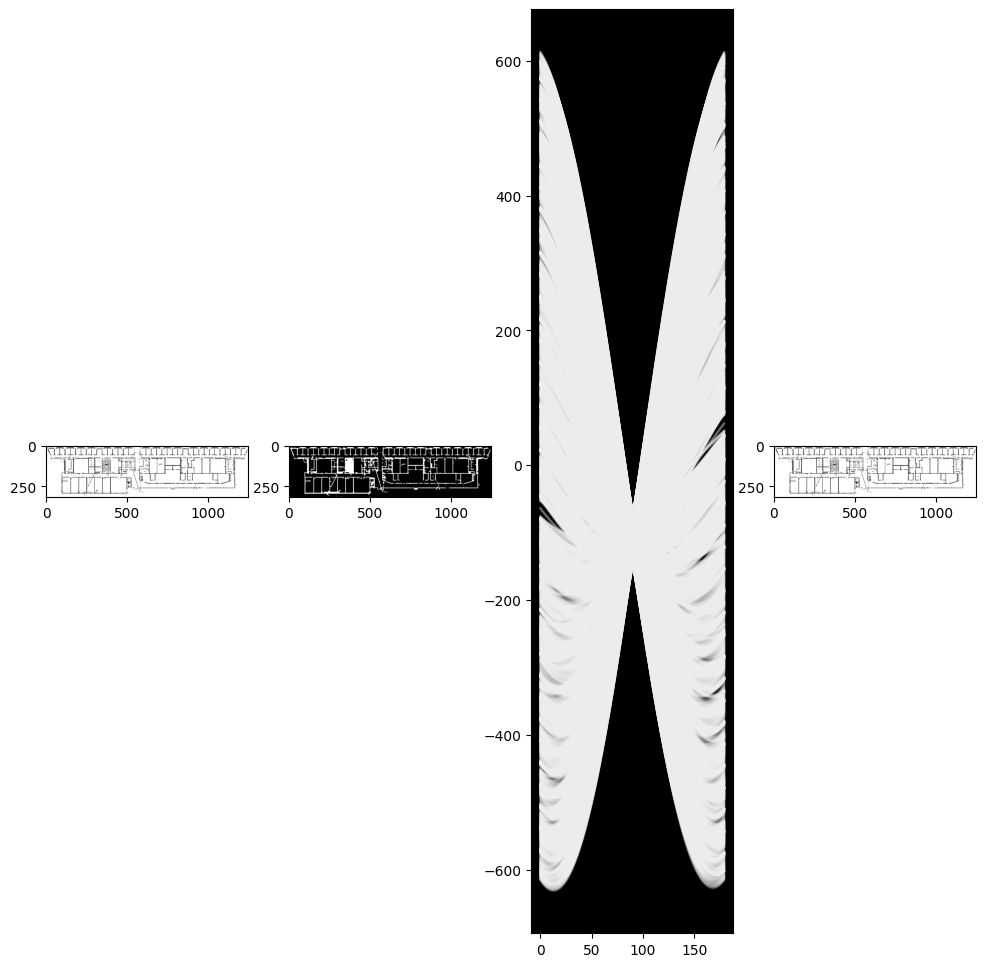

In [11]:
import matplotlib.lines as mlines

def line_detection_non_vectorized(image, edge_image, num_rhos=180, num_thetas=180, t_count=220):
  edge_height, edge_width = edge_image.shape[:2]
  edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
  #
  d = np.sqrt(np.square(edge_height) + np.square(edge_width))
  dtheta = 180 / num_thetas
  drho = (2 * d) / num_rhos
  #
  thetas = np.arange(0, 180, step=dtheta)
  rhos = np.arange(-d, d, step=drho)
  #
  cos_thetas = np.cos(np.deg2rad(thetas))
  sin_thetas = np.sin(np.deg2rad(thetas))
  #
  accumulator = np.zeros((len(rhos), len(rhos)))
  #
  figure = plt.figure(figsize=(12, 12))
  subplot1 = figure.add_subplot(1, 4, 1)
  subplot1.imshow(image)
  subplot2 = figure.add_subplot(1, 4, 2)
  subplot2.imshow(edge_image, cmap="gray")
  subplot3 = figure.add_subplot(1, 4, 3)
  subplot3.set_facecolor((0, 0, 0))
  subplot4 = figure.add_subplot(1, 4, 4)
  subplot4.imshow(image)
  #
  for y in range(edge_height):
    for x in range(edge_width):
      if edge_image[y][x] != 0:
        edge_point = [y - edge_height_half, x - edge_width_half]
        ys, xs = [], []
        for theta_idx in range(len(thetas)):
          rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
          theta = thetas[theta_idx]
          rho_idx = np.argmin(np.abs(rhos - rho))
          accumulator[rho_idx][theta_idx] += 1
          ys.append(rho)
          xs.append(theta)
        subplot3.plot(xs, ys, color="white", alpha=0.05)

  for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
      if accumulator[y][x] > t_count:
        rho = rhos[y]
        theta = thetas[x]
        a = np.cos(np.deg2rad(theta))
        b = np.sin(np.deg2rad(theta))
        x0 = (a * rho) + edge_width_half
        y0 = (b * rho) + edge_height_half
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        subplot3.plot([theta], [rho], marker='o', color="yellow")
        subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))

  subplot3.invert_yaxis()
  subplot3.invert_xaxis()

  subplot1.title.set_text("Original Image")
  subplot2.title.set_text("Edge Image")
  subplot3.title.set_text("Hough Space")
  subplot4.title.set_text("Detected Lines")
  plt.show()
  return accumulator, rhos, thetas


if __name__ == "__main__":
  image = cv.imread("img/reassembled_E2_2.png")
  edge_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  edge_image = cv.GaussianBlur(edge_image, (3, 3), 1)
  edge_image = cv.Canny(edge_image, 100, 200)
  edge_image = cv.dilate(
    edge_image,
    cv.getStructuringElement(cv.MORPH_RECT, (5, 5)),
    iterations=1
  )
  edge_image = cv.erode(
    edge_image,
    cv.getStructuringElement(cv.MORPH_RECT, (5, 5)),
    iterations=1
  )
  line_detection_non_vectorized(image, edge_image)

In [ ]:
height = img.shape[0]
# Saving lines to a CSV file with flipped y-coordinates
with open('lines.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x1', 'y1', 'x2', 'y2'])  # Writing header
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Flip y-coordinates
        y1_flipped = height - y1
        y2_flipped = height - y2
        writer.writerow([x1, y1_flipped, x2, y2_flipped])  # Writing line coordinates

# Get the dimensions of the image for the SVG size
h, w = img.shape[:2]

# Open the SVG file to write the lines
with open("lines.svg", "w+") as f:
    # Start the SVG file
    f.write(f'<svg width="1600" height="500" xmlns="http://www.w3.org/2000/svg">\n')

    # Write each line to the SVG
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Write the line as an SVG path
        f.write(f'<path d="M{x1},{y1} L{x2},{y2}" ')
        f.write('style="stroke:red;stroke-width:2"/>\n')
    
    # End the SVG file
    f.write('</svg>')